# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

# Is the distribution of body temperatures normal? 

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


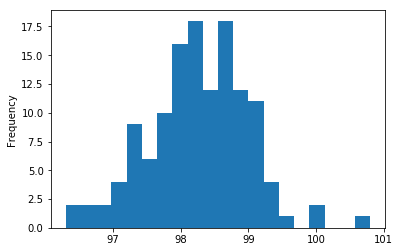

In [4]:
df['temperature'].plot(kind='hist', bins=20)

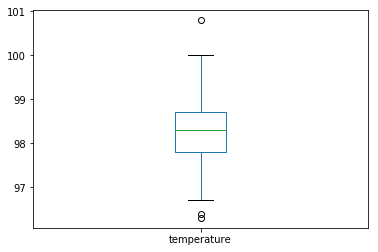

In [5]:
df['temperature'].plot(kind='box')

In [6]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [7]:
#Data seems to be approximately normal and little rightly skewed. To confirm , constructing a normal probability plot

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


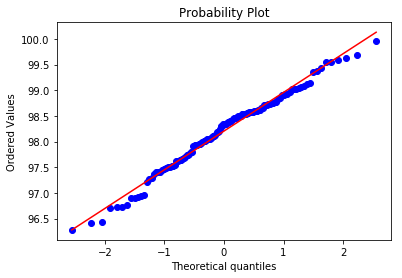

In [9]:

from scipy import stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
x = stats.norm.rvs(loc=df['temperature'].mean(), scale=df['temperature'].std(), size=len(df))
res = stats.probplot(x, plot=plt)
fig.show()

###### Temperature appears normal, normality condition to use CLT is met for this data set

# Is the sample size large?

In [11]:
len(df)

130

In [12]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


###### To hold CLT sample size >= 30. In this dataset sample size is sufficiently large to hold CLT

# Is true population mean really 98.6 deg. F?

In [14]:
mean = df['temperature'].mean()
s = df['temperature'].std()
n = len(df['temperature'])
SE = s / n ** 0.5
print ('Std Error:', SE)

Std Error: 0.06430441683789101


###### Construct a hypothesis test, using z-test since we have > 100 samples and a normally-distributed sample. A t-test could be used, but since there are 130 samples, the 129 degrees of freedom would make the t-distribution very similar to the normal distribution.
H0 (Null Hypothesis) = Mean Temperature = 98.6
HA (Alternative Hypothesis) = Mean Temperature != 98.6

In [15]:
z = (mean - 98.6) / SE
z

-5.454823292364079

###### Since we aren't interested in the direction of the change, use a 2-sided hypothesis test.

In [17]:
p = stats.norm.sf(abs(z))*2
p

4.9021570141133797e-08

###### Since the p-value is much smaller than the significance level (0.05), there is convincing evidence to reject the null hypothesis that the mean temperature is 98.6 deg. F.

# 3. At what temperature should we consider someone's temperature to be "abnormal"?

###### For this analysis, compute the margin of error and 95% confidence interval for the sample distribution.

In [19]:
ME = 1.96 * SE
CI = (mean - ME, mean + ME)
CI

(98.12319411222852, 98.37526742623304)

###### We can be 95% certain that the mean body temperature should be between 98.1 and 98.4 degrees F. Mean temperatures outside this range would be considered abnormal

# Is there a significant difference between males and females in normal temperature?

###### Use a two-sample hypothesis test to determine if a statistically-significant different in normal temperatures occurs between males and females:

###### H0 (null) = mean_males - mean_females == 0

###### HA (alternative) = mean_males - mean_females != 0

###### Since the direction of the difference is unimportant, use a two-sided hypothesis test.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [21]:
males = df[df.gender == 'M']['temperature']
females = df[df.gender == 'F']['temperature']

In [22]:
males.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [23]:
females.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

###### The sample difference of two means can be modeled using the t-distribution. So next, calculate the T-statistic and p-value.

In [25]:
t, p = stats.ttest_ind(males, females, equal_var=False)
print ('t:', t)
print ('p:', p)

t: -2.28543453817
p: 0.0239382641829


###### Since the p-value (0.02) is smaller than the significance level (0.05), there is convincing evidence to reject the null hypothesis that there is no difference in the mean temperature between males and females. Therefore, there is a statistically-significant difference between the mean body temperatures of males and females